# User characterization


In this notebook, we we analyze the traces from the users’ perspective

In [1]:
"""
Note that only the `Venus` trace is public available now. 
Other traces are being censored. We will release them as soon as possible.
"""
# cluster_list = ["Venus", "Earth", "Saturn", "Uranus"]
cluster_list = ["Venus"]

In [2]:
from datetime import timedelta

import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
from pylab import *

matplotlib.font_manager._rebuild()

sns.set_style("ticks")
font = {
    "font.family": "Roboto",
    "font.size": 12,
}
sns.set_style(font)
paper_rc = {
    "lines.linewidth": 3,
    "lines.markersize": 10,
}
sns.set_context("paper", font_scale=1.6, rc=paper_rc)
current_palette = sns.color_palette()


def load_data(cluster, opt):
    """Data Loading & Processing"""
    if opt == "user":
        df = pd.read_pickle(f"../../data/{cluster}/cluster_user.pkl")
    elif opt == "log":
        df = pd.read_csv(
            f"../../data/{cluster}/cluster_log.csv",
            parse_dates=["submit_time", "start_time", "end_time"],
        )
    else:
        raise ValueError("Please check opt")

    return df

##  User Runtime
The CDFs of users that consume the cluster resources

(a) GPU Time 

(b) CPU Time

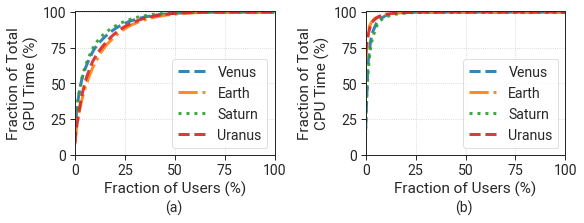

In [3]:
def plot_cdf_time_user(cluster_list, save=False):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, nrows=1, constrained_layout=True, figsize=(8, 3)
    )

    linestyles = ["--", "-.", ":", "--"]

    for k in range(0, len(cluster_list)):
        g_time, c_time = [], []
        udf = load_data(cluster_list[k], "user")

        gpu_time = udf["total_gpu_time"].copy()
        gpu_time.sort_values(ascending=False, inplace=True)
        gpu_time_sum = gpu_time.sum()

        cpu_time = udf["total_cpu_only_time"].copy()
        cpu_time.sort_values(ascending=False, inplace=True)
        cpu_time_sum = cpu_time.sum()

        for i in range(len(udf)):
            g_time.append(gpu_time.iloc[: i + 1].sum() / gpu_time_sum * 100)
            c_time.append(cpu_time.iloc[: i + 1].sum() / cpu_time_sum * 100)

        ax1.plot(
            np.linspace(0, 100, len(udf)),
            g_time,
            linestyles[k],
            alpha=0.9,
            label=cluster_list[k],
        )

        ax2.plot(
            np.linspace(0, 100, len(udf)),
            c_time,
            linestyles[k],
            alpha=0.9,
            label=cluster_list[k],
        )

    ax1.set_xlabel(f"Fraction of Users (%)")
    ax1.set_ylabel(f"Fraction of Total\nGPU Time (%)")
    ax1.set_xlim(0, 100)
    ax1.set_ylim(0, 101)
    ax1.legend(loc="lower right")
    ax1.grid(linestyle=":")
    ax1.text(0.45, -0.4, "(a)", transform=ax1.transAxes, size=14)

    ax2.set_xlabel(f"Fraction of Users (%)")
    ax2.set_ylabel(f"Fraction of Total\nCPU Time (%)")
    ax2.set_xlim(0, 100)
    ax2.set_ylim(0, 101)
    ax2.legend(loc="lower right")
    ax2.grid(linestyle=":")
    ax2.text(0.45, -0.4, "(b)", transform=ax2.transAxes, size=14)

    if save:
        fig.savefig(
            f"./user_cdf_time.pdf", bbox_inches="tight", dpi=600,
        )


plot_cdf_time_user(cluster_list, save=True)

## User Queuing Time
(a) CDFs of users w.r.t. GPU job queuing delay. 

(b) Distributions of user GPU job completion ratios.

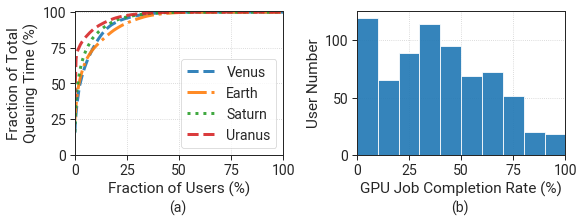

In [4]:
def plot_cdf_pend_user(cluster_list, save=False):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, nrows=1, constrained_layout=True, figsize=(8, 3)
    )

    linestyles = ["--", "-.", ":", "--"]

    for k in range(0, len(cluster_list)):
        g_num = []
        udf = load_data(cluster_list[k], "user")

        gpu_time = udf["total_gpu_pend_time"].copy()
        gpu_time.sort_values(ascending=False, inplace=True)
        gpu_time_sum = gpu_time.sum()

        for i in range(len(udf)):
            g_num.append(gpu_time.iloc[: i + 1].sum() / gpu_time_sum * 100)

        ax1.plot(
            np.linspace(0, 100, len(udf)),
            g_num,
            linestyles[k],
            alpha=0.9,
            label=cluster_list[k],
        )

    udf = pd.read_pickle(f"../../data/cluster_user.pkl")
    state = udf["completed_gpu_percent"].copy() * 100
    ax2 = sns.histplot(
        state, bins=10, stat="count", kde=False, alpha=0.9, label="Completed"
    )

    ax1.set_xlabel(f"Fraction of Users (%)")
    ax1.set_ylabel(f"Fraction of Total\nQueuing Time (%)")
    ax1.set_xlim(0, 100)
    ax1.set_ylim(0, 101)
    ax1.legend(loc="lower right")
    ax1.grid(linestyle=":")
    ax1.text(0.45, -0.4, "(a)", transform=ax1.transAxes, size=14)

    ax2.set_xlabel(f"GPU Job Completion Rate (%)")
    ax2.set_ylabel(f"User Number")
    ax2.set_xlim(0, 100)
    ax2.grid(linestyle=":")
    ax2.text(0.45, -0.4, "(b)", transform=ax2.transAxes, size=14)

    if save:
        fig.savefig(
            f"./user_cdf_pend.pdf", bbox_inches="tight", dpi=600,
        )


plot_cdf_pend_user(cluster_list, save=True)